<p align = "center">
    <img src="https://blueedtech.com.br/wp-content/themes/blue/dist/images/logo-blue-croped.gif", width = "400em" />
</p>

In [1]:
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG, display
import plotly.io as pio

from imblearn.over_sampling import RandomOverSampler
from collections import Counter


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest, RFE

# Estudo prévio dos dados


### Dicionário dos dados

&nbsp;&nbsp;&nbsp;&nbsp;IBM coletou informações sobre a satisfação dos funcionários, renda, senioridade e algumas demográficas (Área das ciências sociais que estuda a dinâmica da população humana (Wikipedia)), o estudo incluiu dados de 1470 empregados e o dicionário de dados está interpretado a seguir (Ramirez *et al.* 2018, traduzido):

| Name | Description |
| :--- | :---|
| AGE | Valor numérico |
|ATTRITION| Empregado saindo da empresa (0 - Não \| 1 - Sim) |
|BUSINESS TRAVEL|1 - Não viaja \| 2 - Viaja frequentemente \| 3 - Viaja raramente |
|DAILY RATE| Valor numérico do nível de salário|
|DEPARTMENT|1- Recursos humanos (Human Resources) \| 2 - Procura e desenvolvimento (R&D - Research and Development) \| 3 - Vendas (Sales)|
|DISTANCE FROM HOME|Valor numérico - Distância da casa para o trabalho|
|EDUCATION|1 - Não possui escolaridade \| 2 - Escolaridade básica \| 3 - Bacharel \| 4 - Mestre \| 5 - Doutor |
|EDUCATION FIELD|1 - Recursos Humanos (Human resources) \| 2 - Ciências da vida (Life Sciences) \| 3 - Marketing \| 4 - Ciências médicas (Medical sciences) \| 5 - Outros (Others) \| 6 - Técnico (Technical)|
|EMPLOYEE COUNT|Representa a contagem de empregados (sempre igual a 1)|
|EMPLOYEE NUMBER|ID do funcionário|
|ENVIROMENT SATISFACTION|Nota da pesquisa de satisfação ( 1 - Baixo \| 2 - Médio \| 3 - Alto \| 4 - Muito Alto) |
|GENDER| 1 - Mulher \| 2 - Homem|
|HOURLY RATE| Valor numérico - Salário por hora| 
|JOB INVOLVEMENT|Envolvimento com o trabalho (1 - Baixo \| 2 - Médio \| 3 - Alto \| 4 - Muito Alto) |
|JOB LEVEL| Nível do trabalho |
|JOB ROLE|  1 - Representante de cuidados de saúde \| 2 - Recursos Humanos \| 3 - Técnico de laboratório \| 4 -Gerente \| 5 - Diretor de Gestão \|  6 - Diretor de pesquisa \| 7 - Cientista de pesquisa \| 8 - Executivo de vendas \| 9 - Representante de vendas |
|JOB SATISFACTION| Satisfação com o trabalho (1 - Baixo \| 2 - Médio \| 3 - Alto \| 4 - Muito Alto) |
|MARITAL STATUS| 1 - Divorciado \| 2 - Casado \| 3 - Solteiro |
|MONTHLY INCOME|Valor numérico - Salário mensal|
|MONTHY RATE|   Taxa mensal (Quantidade de lucro gerada a empresa)|
|NUMCOMPANIES WORKED| Numérico de companhias trabalhadas|
|OVER 18|Maior de idade (1 - Sim \| 2 - No)|
|OVERTIME| Horas extras (1 - Não \| 2 - Sim)|
|PERCENT SALARY HIKE| Porcentagem de aumento de salário|
|PERFORMANCE RATING| Taxa de performance no trabalho (1 - Baixo \| 2 - Médio \| 3 - Alto \| 4 - Muito Alto)|
|RELATIONS SATISFACTION| Satisfação com as relações dentro do trabalho (1 - Baixo \| 2 - Médio \| 3 - Alto \| 4 - Muito Alto)|
|STANDARD HOURS| Horas padrão|
|STOCK OPTIONS LEVEL|Nível de opções de estoque|
|TOTAL WORKING YEARS|Total de anos trabalhados|
|TRAINING TIMES LAST YEAR| Horas que passou sob treinamento|
|WORK LIFE BALANCE| Tempo gasto dentro do trabalho e fora do trabalho|
|YEARS AT COMPANY| Total de anos na empresa|
|YEARS IN CURRENT ROLE| Total de anos no cargo|
|YEARS SINCE LAST PROMOTION| Quantidade de anos desde a última promoção
|YEARS WITH CURRENT MANAGER| Anos gastos com o gerente atual

## Objetivos do projeto

&nbsp;&nbsp;&nbsp;&nbsp;O objetivo do trabalho é buscar relações entre as variáveis estudas e a rotatividade, com isso a variável que irá ser estudada é a variável *ATTRITION* que será transformada em *turnover*.

## Diretrizes do projeto

1. Estudo inicial dos dados
    1. Visualização dos dados
    2. Visualização via gráficos
2. Manejamento dos dados
    1. Retirada de ruídos
    2. Verificação da necessidade de substituição de dados (caso necessário)
3. Estudo dos modelos
    1. Pré-processamento
    2. Modelos de regressão
    3. Modelos de classificação
    4. Analise de métricas (Apartir dessa etapa o projeto pode voltar etapas)
4. Conclusão do trabalho

## Formatação do projeto

&nbsp;&nbsp;&nbsp;&nbsp;O projeto apresentado irá responder as questões apresentadas pela Blue EdTech, das quais são:

- Exercício 1 (2 pontos)

    &nbsp;&nbsp;&nbsp;&nbsp;Realize uma análise sobre as variáveis independentes em relação a variável turnover. Quais ideias você obteve? Faça uma pequena apresentação de três a quatro gráficos e escreva suas percepções abaixo de cada um.

- Exercício 2 (1 ponto)

    &nbsp;&nbsp;&nbsp;&nbsp;Faça seleção de características e selecione as 8 variáveis mais importantes. Escreva quais são elas e destaque as variáveis que estão presentes nas ideias apresentadas no exercício 1.

- Exercício 3 (2 pontos)

    &nbsp;&nbsp;&nbsp;&nbsp;Construa um modelo de árvore de decisão. Obtenha os valores das métricas: acurácia, precisão e sensitividade.
- Exercício 4 (1 ponto)

    &nbsp;&nbsp;&nbsp;&nbsp;Faça a representação da árvore e observe como foi realizado cada ramificação. Explique o que é GINI e quais seriam as desvantagens?

- Exercício 5 (3 pontos)

    &nbsp;&nbsp;&nbsp;&nbsp;Chamamos de overfitting (superajuste) a situação onde um modelo "decora" como predizer o conjunto de treino, mas tende a errar muito ao predizer o conjunto de teste. Dizemos que este modelo não generaliza, não consegue lidar com dados novos. Vimos dois modelos de diferentes estrategias de aprendizado por agrupamento durante as aulas. Qual destes modelos tem maior chance de sofrer um overfitting e por quê?

- Exercício 6 (1 ponto)

    &nbsp;&nbsp;&nbsp;&nbsp;Você recomendaria o seu modelo para uma empresa utilizar em seu setor de Recursos Humanos? Como você explicaria para um setor que não possui conhecimento algum sobre Ciência de Dados que um modelo com 100% de acurácia é impossível de se obter?


### Estudo inicial dos dados / Exercício 1

In [2]:
# Upar arquivo do github e usar pra dar o read_csv
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df['turnover'] = df['Attrition'].replace({'Yes':1, 'No': 0})

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,turnover
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


&nbsp;&nbsp;&nbsp;&nbsp;As variáveis que serão estudadas serão em torno da variável *Attrition*, visto que é uma variável categórica nominal e para visualização dos dados é uma variável mais atraente, mas depois será efetuada a remoção da mesma para um estudo mais profundo

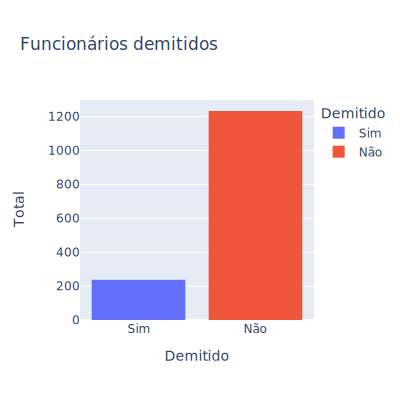

In [5]:
fig = px.histogram(
            df, x='Attrition', color = 'Attrition', 
            width=400, height=400, 
            title = 'Funcionários demitidos',
            labels = {'Attrition': 'Demitido'},
            color_discrete_sequence=px.colors.qualitative.Plotly,
            )
newnames = {'Yes':'Sim', 'No':'Não'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.update_layout(
                    xaxis = dict(
                                tickvals = ['Yes', 'No'],
                                ticktext = ['Sim', 'Não']
                                ),
                    yaxis_title = 'Total'
                )
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

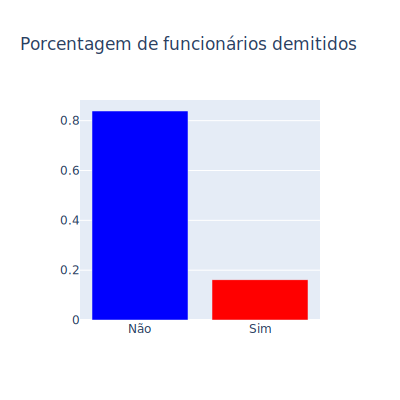

In [6]:
colors = ['rgb(0, 0, 256)','rgb(256, 0, 0)']

fig = go.Figure(
                go.Bar(
                x=df['Attrition'],
                y=df.value_counts(['Attrition'], normalize=True),
                marker_color= colors
                    )
                )

fig.update_layout(
                height=400, width=400, 
                title='Porcentagem de funcionários demitidos',
                    xaxis = dict(
                                tickvals = ['Yes', 'No'],
                                ticktext = ['Não', 'Sim']
                                )
                )
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

&nbsp;&nbsp;&nbsp;&nbsp;Analisando as informações da variável *target*, é claramente necessário realizar um *undersampling* nos dados, visto que os funcionários demitidos são apenas 16.12% do nosso conjunto de dados e 83.88% dos dados são funcionários que trabalham na empresa. Sendo assim, já que existe uma grande variação dos dados entre as variáveis alvos, será efetuado o método especificado anteriormente.

&nbsp;&nbsp;&nbsp;&nbsp;Para uma análise inicial dos dados, existe uma grande variação entre os valores de sim e não, então uma das hipóteses que serão levantadas acerca desse gráfico é que um *undersampling* é necessário, que é basicamente manter todos os dados da minoria e retirar alguns dados da maioria, buscando um melhor balanceamento dos dados para os modelos de treino e teste.

[Text(0, 0, 'Homens'), Text(1, 0, 'Mulheres')]

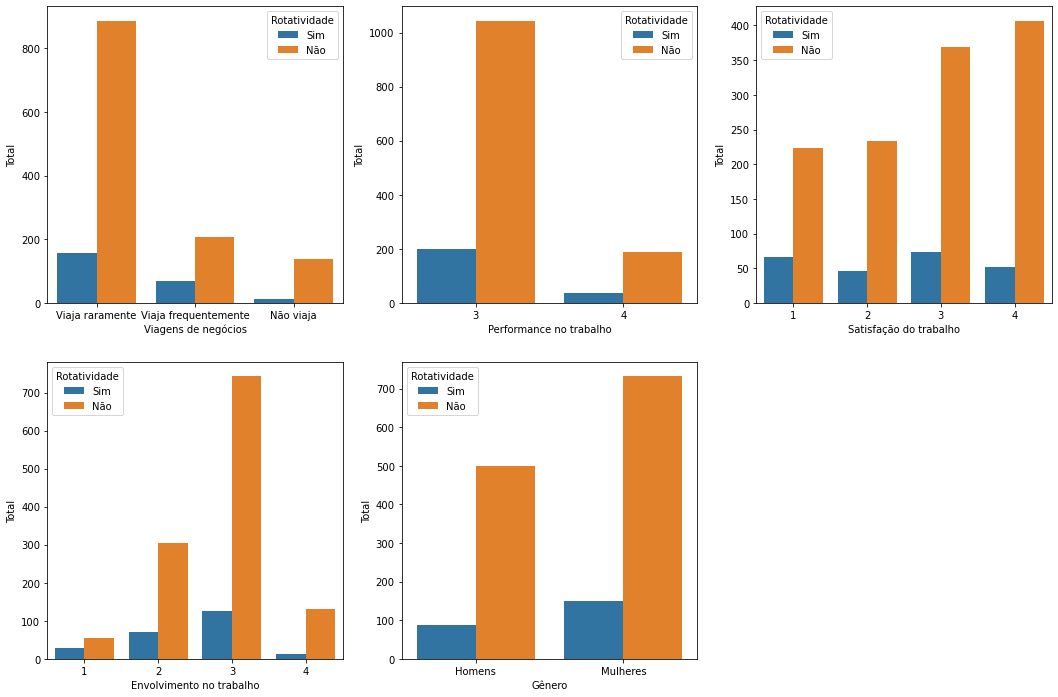

In [7]:
#Variável EnvironmentSatisfaction
plt.figure(figsize = (18,12))
plt.subplot(231)
xticks = ['Viaja raramente','Viaja frequentemente','Não viaja']
sns.countplot(data = df, x = 'BusinessTravel', hue = 'Attrition')
plt.ylabel('Total')
plt.xlabel('Viagens de negócios')
plt.legend(title = 'Rotatividade', loc = 'upper right', labels = ['Sim','Não'])
plt.subplot(231).set_xticklabels(xticks)

plt.subplot(232)
sns.countplot(data = df, x = 'PerformanceRating', hue = 'Attrition')
plt.ylabel('Total')
plt.xlabel('Performance no trabalho')
plt.legend(title = 'Rotatividade', loc = 'upper right', labels = ['Sim','Não'])

plt.subplot(233)
sns.countplot(data = df, x = 'JobSatisfaction', hue = 'Attrition')
plt.ylabel('Total')
plt.xlabel('Satisfação do trabalho')
plt.legend(title = 'Rotatividade', loc = 'upper left', labels = ['Sim','Não'])

plt.subplot(234)
sns.countplot(data = df, x = 'JobInvolvement', hue = 'Attrition')
plt.ylabel('Total')
plt.xlabel('Envolvimento no trabalho')
plt.legend(title = 'Rotatividade', loc = 'upper left', labels = ['Sim','Não'])


plt.subplot(235)
sns.countplot(data = df, x = 'Gender', hue = 'Attrition')
xticks = ['Homens','Mulheres']
plt.ylabel('Total')
plt.xlabel('Gênero')
plt.legend(title = 'Rotatividade', loc = 'upper left', labels = ['Sim','Não'])
plt.subplot(235).set_xticklabels(xticks)

&nbsp;&nbsp;&nbsp;&nbsp;Para analises iniciais, aparentemente job satisfaction não conta muito sobre o conjunto de dados, os resultados para quem foi demitido estão bem parecidos, então, de primeira impressão, os dados não parecem ser importantes.

&nbsp;&nbsp;&nbsp;&nbsp;A variável Business Travel talvez tenha um impacto considerável nos resultados, pois é notório que a maioria dos empregados que foram demitidos viajam ou raramente ou frequentemente.

&nbsp;&nbsp;&nbsp;&nbsp;É estanho o comportamento do performance rating, pois os resultados estão todos entre 3 e 4, então provavelmente esses dados não contam muito sobre o conjunto de dados, mesmo que a maioria das pessoas quem foram demitidas são pessoas que estão com a performance 3.

&nbsp;&nbsp;&nbsp;&nbsp;A variável Job Involvement provavelmente deve contar bastante, pois como é claramente expresso pelo gráfico, grande parte das pessoas que são demitidas estão entre 2 e 3, sendo que as pessoas entre 1 e 4 são as que menos são demitidos. Também é importante destacar que a maioria bruta das pessoas que é demitida é homem.

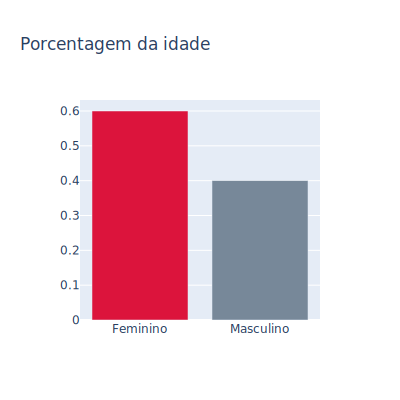

In [8]:
colors = ['crimson','lightslategray']

fig = go.Figure(go.Bar(
    x=df['Gender'],
    y=df.value_counts(['Gender'], normalize=True),
    marker_color= colors,
))

fig.update_layout(height=400, width=400, 
    title='Porcentagem da idade',
    xaxis = dict(
        tickvals = ['Female', 'Male'],
        ticktext = ['Feminino', 'Masculino']
        )
)
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

&nbsp;&nbsp;&nbsp;&nbsp;Relacionando a variável idade normalizada, a grande parte das pessoas que são demitidas são mulheres e não homens.

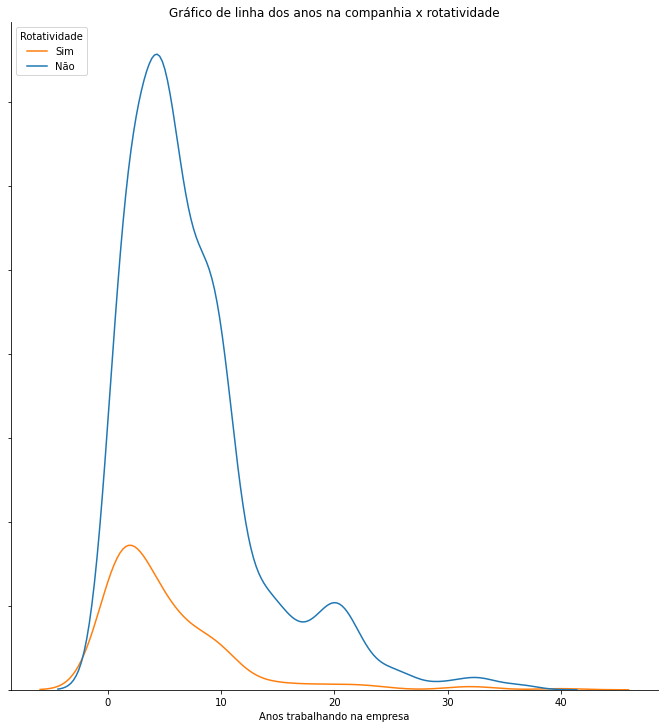

In [9]:
fig = sns.displot(df, x="YearsAtCompany", kind="kde", hue = 'turnover', height=10, weights=10)
plt.title('Gráfico de linha dos anos na companhia x rotatividade')
plt.legend(title = 'Rotatividade', loc = 'upper left', labels = ['Sim','Não'])
fig.set(ylabel = None, yticklabels = [])
fig.set(xlabel = 'Anos trabalhando na empresa')
fig._legend.remove()

&nbsp;&nbsp;&nbsp;&nbsp;Aparentemente, em relação a anos na companhia, a linha de funcionários demitidos e a linha de funcionários que trabalham na empresa são bem parecidas, todavia existe uma probabilidade grande de uma pessoa que trabalhou em torno dos 12 anos ou mais continue trabalhando na empresa, mostrando que talvez exista uma alta correlação entre a variável '*turnover*' e '*YearsAtCompany*'

### Seleção das variáveis e montagem do modelo / Exercício 2 e 3  
OBS: O Desenvolvimento das duas questões está no decorrer das células

In [10]:
#Drop de variáveis lixo
df.drop(['Attrition','EmployeeCount','Over18','EmployeeNumber'],axis = 1,inplace = True)

In [11]:
df.shape

(1470, 32)

&nbsp;&nbsp;&nbsp;&nbsp;Nova formatação das variáveis categoricas nominais modificadas:

| Name | Description |
| :--- | :---|
|DEPARTMENT| 0 -Research and Development \| 1 - Human Resources \| 2 - Sales |
|EDUCATION FIELD| 0 - Life Sciences \| 1 -  Human Resources \| 2 - Technical Degree \| 3 - Marketing \| 4 - Medical \| 5 -  Others|
|JOB ROLE|	0 - Sales Executive \| 1 - Research Scientist \| 2 - Laboratory Technician \| 3 - Manufacturing Director \| 4 - Healthcare Representative \| 5 - Manager \| 6 - Sales Representative \| 7 - Research Director \| 8 - Human Resources |
|BUSINESS TRAVEL| 0 - Travel Rarely \| 1 - Travel Frequently \| 2 - Non Travel |
|GENDER| 0 - Female \| 1 - Male |
|MARITAL STATUS| 0 - Single \| 1 - Married \| Divorced - 2 |
|OVERTIME| 0 - Yes \| 1 - No|

In [12]:
df['Department'] = df['Department'].replace({'Research & Development': 0, 'Human Resources': 1,'Sales': 2})
df['EducationField'] = df['EducationField'].replace({'Life Sciences': 0, 'Human Resources': 1, 'Technical Degree': 2,'Marketing':3,'Medical':4,'Other':5})
df['JobRole'] = df['JobRole'].replace({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3,'Healthcare Representative': 4,'Manager': 5,'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8})
df['BusinessTravel'] = df['BusinessTravel'].replace({'Travel_Rarely':0,'Travel_Frequently':1,'Non-Travel':2})
df['Gender'] = df['Gender'].replace({'Female':0,'Male':1})
df['MaritalStatus'] = df['MaritalStatus'].replace({'Single':0,'Married':1,'Divorced':2})
df['OverTime'] = df['OverTime'].replace({'Yes':0,'No':1})

In [13]:
X = df.copy().drop(['turnover'],axis = 1)
y = df.copy()['turnover']

#### Undersampling ou oversampling

&nbsp;&nbsp;&nbsp;&nbsp;O *undersampling* que será utilizado será implementando através da biblioteca *imlearn*, utilizando o pacote *RandomUnderSampler*. Este pacote visa reduzir o conjunto majoritário para um ponto em comum que pode ser definido através do comando '*sampling_strategy*', este campo pode receber tanto *float*, variando de 0 a 1, o valor dessa variável significa o resultado da razão entre os dados minoritários e dados majoritários, ou seja, caso existam 1000 exemplos nos dados majoritários e 100 nos minoritário e esse valor seja igual a 1 os dados majoritários serão reduzidos a 100 (100/100 = 1) e caso esse valor seja igual a 0.5 o valor do conjunto majoritário será reduzido a 200 (100/200 = 0.5). Essa variável também pode receber uma *str* sendo ela '*majority*', que automaticamente coloca o valor do conjunto majoritário igual ao valor do conjunto minoritário.

&nbsp;&nbsp;&nbsp;&nbsp;O oversampling funciona parecido com a implementação do undersampling, todavia este pacote visa aumentar o conjunto minoritário. O atributo '*sampling_strategy*', recebe os mesmos parâmetros do comando no undersampling, todavia ao invés dele receber uma *str* igual a  *majority* ela recebe a variável *minority*.

&nbsp;&nbsp;&nbsp;&nbsp;Neste projeto, inicialmente será utilizado o undersampling e caso o undersampling não traga resultados satisfatórios, será utilizado o oversampling.


In [14]:
df.value_counts(['turnover'])

turnover
0           1233
1            237
dtype: int64

In [15]:
oversample = RandomOverSampler(sampling_strategy = 0.97, random_state=10)
X_resampled, y_resampled = oversample.fit_resample(X,y)

&nbsp;&nbsp;&nbsp;&nbsp;A utilização do oversampling foi por conta que as métricas atingidas utilizando o under sampling não foram satisfatórias e as métricas com o oversampling atingiram resultados satisfatórios.

In [16]:
#Tamanho do dataframe reamostrado, sendo que acima é o dataframe original e abaixo é o reamostrado
print(Counter(y).items())
print(Counter(y_resampled).items())

dict_items([(1, 237), (0, 1233)])
dict_items([(1, 1196), (0, 1233)])


In [17]:
#Função de definição do modelo de feature selection que será utilizado
def feat_selec(model_name: str):

    dict_feature_selection = {
                                'Chi Squared': SelectKBest(chi2, k = 8).fit(X_resampled, y_resampled), 
                                'RFE' : RFE(estimator = RandomForestClassifier(random_state=10), n_features_to_select=8).fit(X_resampled, y_resampled)
                            }
    global X_new
    X_new = dict_feature_selection[model_name]

&nbsp;&nbsp;&nbsp;&nbsp;O modelo de *feature selection* do Chi quadrado é um modelo chamado de *filter*, modelos *filter* utilizam uma função chamada de *SelectKBest* que faz a utilização de metodologias estatísticas para seleção de variáveis buscando relações entre as variáveis preditoras e alvo, é importante destacar que esses atributos podem ser tanto de classificação quanto de regressão, porém o chi quadrado só trabalha com variáveis categóricas.

&nbsp;&nbsp;&nbsp;&nbsp; O RFE faz parte de um modelo chamado de *Wrapper*, em que esse modelo busca utilizar outros modelos buscando obter métricas e correlações entre as variáveis e selecionando a melhor combinação entre elas, o RFE por sua vez faz isso através de eliminação, ele executa o algoritmo e a variável que menos tem afinidade com o modelo é excluída e ele vai executando até o número de variáveis ser igual ao *n_features_to_select*.


In [18]:
#Modelo para Chi quadrado
def model_chi2():
    feat_selec(model_name='Chi Squared')
    global X1,y1
    X1 = X_resampled[X_new.get_feature_names_out()]
    y1 = y_resampled

    X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1, random_state=10, test_size=0.2)
    global dt_chi2
    dt_chi2 = DecisionTreeClassifier(random_state=10)
    dt_chi2.fit(X_train1,y_train1)
    y_pred1 = dt_chi2.predict(X_test1)
    chi2_dict_metrics = {'Acurácia': accuracy_score(y_test1, y_pred1).round(3), 'Precisão':precision_score(y_test1, y_pred1, average='macro').round(3), 'Sensibilidade':recall_score(y_test1, y_pred1, average='macro').round(3)}
    global chi2_metrics_chi2
    chi2_metrics_chi2 = pd.DataFrame(chi2_dict_metrics, columns=['Acurácia', 'Precisão', 'Sensibilidade'], index = ['Chi quadrado'])
    global feat_selection_chi2
    feat_selection_chi2 = pd.DataFrame(X_new.get_feature_names_out(), columns=  ['feature names'])
model_chi2()

In [19]:
#Métricas para o chi quadrado
chi2_metrics_chi2

,Acurácia,Precisão,Sensibilidade
Chi quadrado,0.918,0.927,0.919


In [20]:
#Melhores variáveis para o chi quadrado
feat_selection_chi2.T

,0,1,2,3,4,5,6,7
feature names,Age,DailyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager


In [21]:
def model_mut_inf():
    feat_selec(model_name='RFE')
    global X3, y3
    X3 = X_resampled[X_new.get_feature_names_out()]
    y3 = y_resampled


    X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y3, random_state=10, test_size=0.2)
    global dt_rfe
    dt_rfe = DecisionTreeClassifier(random_state=10)
    dt_rfe.fit(X_train3,y_train3)
    y_pred3 = dt_rfe.predict(X_test3)
    mutual_info_dict_metrics = {'Acurácia': accuracy_score(y_test3, y_pred3).round(3), 'Precisão':precision_score(y_test3, y_pred3, average='macro').round(3), 'Sensibilidade':recall_score(y_test3, y_pred3, average='macro').round(3)}
    global chi2_metrics_rfe
    chi2_metrics_rfe = pd.DataFrame(mutual_info_dict_metrics, columns=['Acurácia', 'Precisão', 'Sensibilidade'], index = ['RFE'])
    global feat_selection_rfe
    feat_selection_rfe = pd.DataFrame(X_new.get_feature_names_out(), columns=  ['Feature names RFE'])
model_mut_inf()

In [22]:
feat_selection_rfe.T

,0,1,2,3,4,5,6,7
Feature names RFE,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany


In [23]:
chi2_metrics_rfe

,Acurácia,Precisão,Sensibilidade
RFE,0.907,0.919,0.908


MÉTRICAS:

| Método | Acurácia | Precisão | Recall ou sensibilidade |
| :--- | :--- | :--- | :--- |
| Chi quadrado | 0.918 | 0.927 | 0.919 |
| RFE | 0.907 | 0.919 | 0.908 |

MELHORES 8 VARIÁVEIS:

| Método | VAR1 | VAR2 | VAR3 | VAR4 | VAR5 | VAR6 | VAR7 | VAR8 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| Chi quadrado | Age| DailyRate | MonthlyIncome | MonthlyRate | TotalWorkingYears | YearsAtCompany | YearsInCurrentRole | YearsWithCurrManager|
| RFE | Age | DailyRate | DistanceFromHome | HourlyRate | MonthlyIncome | MonthlyRate | TotalWorkingYears |	YearsAtCompany |

A única variável que faz parte das análises do exercício 1 é a variável YearsAtCompany.

### Visualização da árvore de decisão e definição de Gini/ Exercício 4

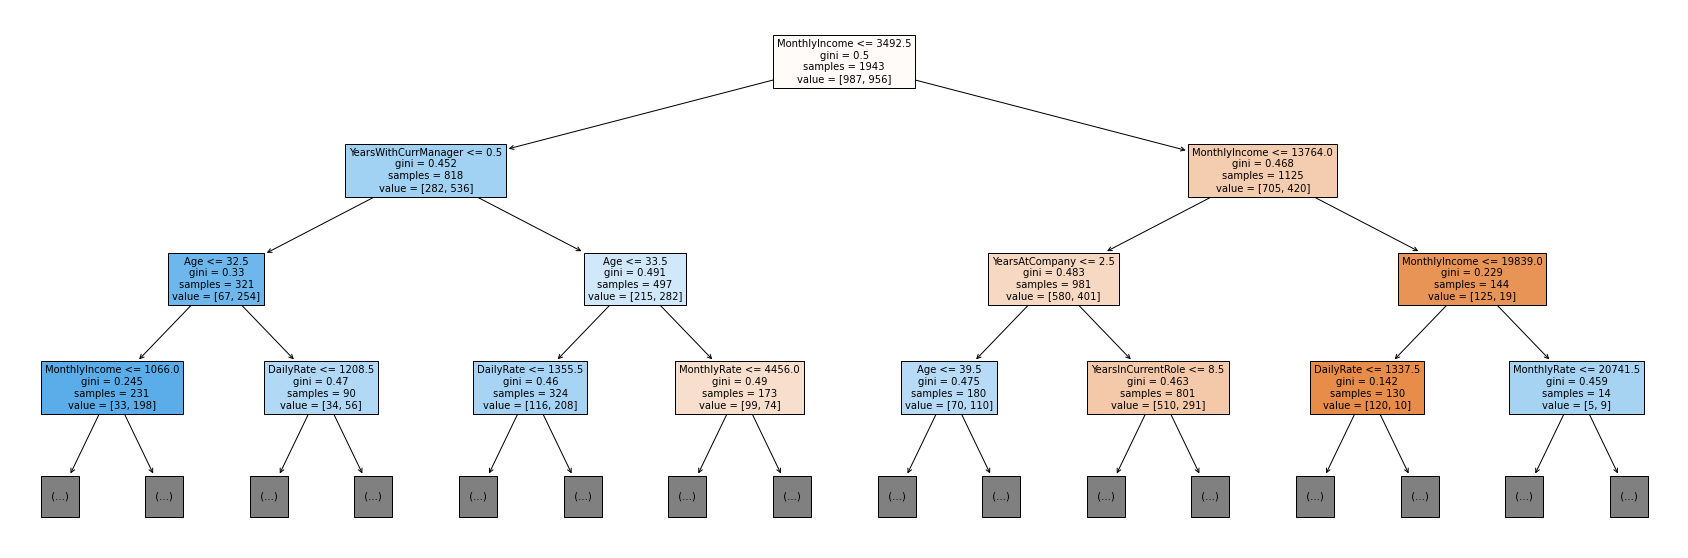

In [24]:
# Árvode de decisão seleção Chi quadrado
plt.figure(figsize = [30,10])
names = X1.columns
target = y1.name
plot_tree(dt_chi2,filled=True, fontsize=10, feature_names= names, max_depth=3);

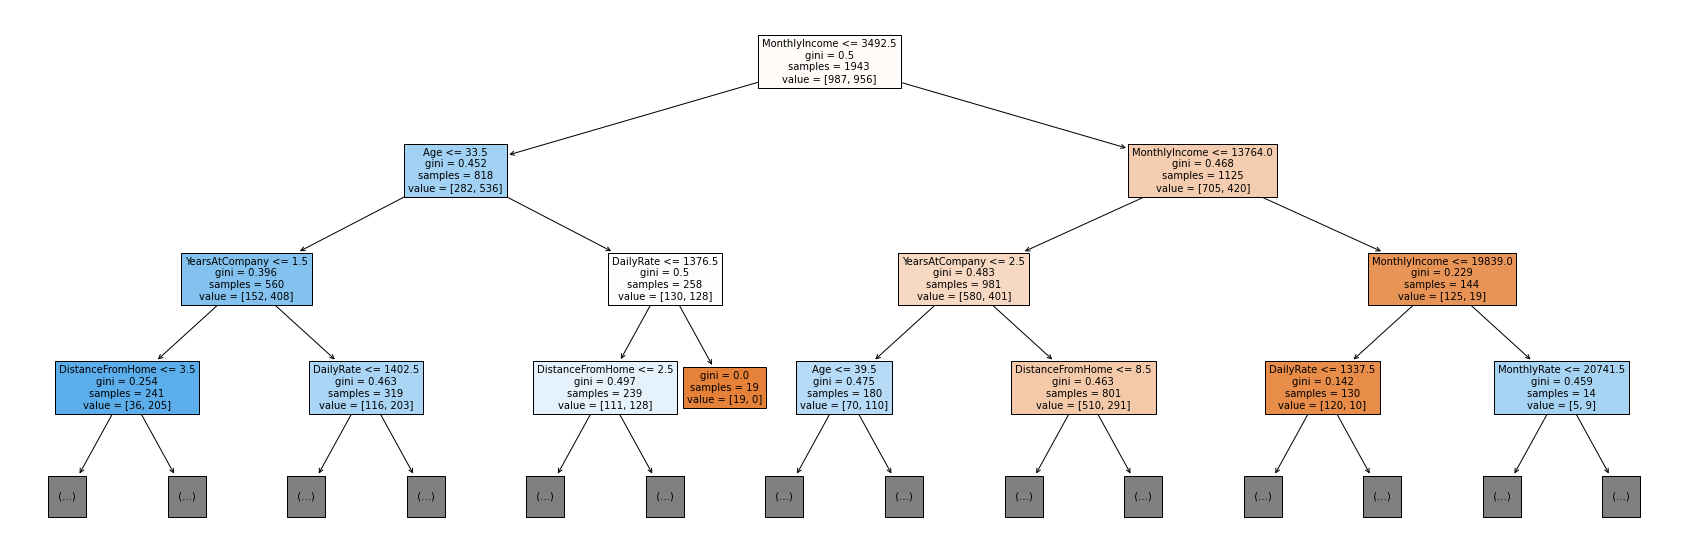

In [25]:
# Árvode de decisão seleção RFE
plt.figure(figsize = [30,10])
names = X3.columns
target = y3.name
plot_tree(dt_rfe,filled=True, fontsize=10, feature_names= names, max_depth=3);

&nbsp;&nbsp;&nbsp;&nbsp;Através das visualizações das árvores de decisão, é possível perceber que existe algumas variáveis que se mostram bem mais relevantes no modelo, como MonthlyIncome, YearsAtCompany, Age, e DailyRate. Dentro do sistema de uma árvore de decisão, o nó inicial significa a variável mais importante dentro do conjunto de dados que é analisado, sendo assim, pode-se perceber que em dois modelos de árvore de decisão a variável *MonthlyIncome* se mostrou mais importante.

As métricas foram montadas anteriormente, mas elas podem ser visualizadas de maneira compactada através da tabela construída abaixo novamente:

| Método | Acurácia | Precisão | Recall ou sensibilidade |
| :--- | :--- | :--- | :--- |
| Chi quadrado | 0.918 | 0.927 | 0.919 |
| RFE | 0.907 | 0.919 | 0.908 |

&nbsp;&nbsp;&nbsp;&nbsp;Como é de se destacar as métricas entre o Chi quadrado e o RFE são diferentes, sendo que o chi quadrado apresentou as melhores métricas, logo sendo o modelo de *feature selection* escolhido deste projeto. Neste projeto foram analisados um método *Wrapper* e um *Filter*, sendo que o *filter* foi o que melhor se destacou nos resultados, fora os dois modelos que foram citados, também existe um módelo chamado de *Embedded Methods*, que diferente dos outros dois, ele utiliza um pouco dos dois.

#### O que é Gini e Entropia (Entropy)?

1. Gini

&nbsp;&nbsp;&nbsp;&nbsp;De acordo com Sharma (2022), o índice Gini é uma métrica utilizada para medição da frequência de um elemento escolhido de forma aleatória, este sendo classificado erroneamente. Este índice varia de 0 a 1 sendo que quanto mais próximo de 1 mais poluído é o conjunto de informações, sendo que caso o índice seja igual a 0, o nó é puro. A formula do Gini pode ser escrita como:

Gini = 1 - $\sum_{j}^{n} p_j^2$

&nbsp;&nbsp;&nbsp;&nbsp;Sendo que:
- p - frequência das classes
- n - número de classes

2. Entropia (Entropy)

&nbsp;&nbsp;&nbsp;&nbsp;A entropia, segundo Silva (2005), pode ser definida como o cálculo de ganho de informação baseando-se em um cálculo matemático da teória da informação, sendo que este cálculo classifica a impureza dos dados dentro de um conjunto de dados, sendo capaz de mensurar a heteroneidade dos dados de entrada relacionada a sua classificação, sendo que a entropia máxima é igual a 1, quando os dados são muito heterogêneos. A entropia pode matematicamente ser definida como:

S = $\sum_{i=1}^{c}$ - $p_i log_{2}(p_i)$

&nbsp;&nbsp;&nbsp;&nbsp;Sendo que:

- S - Entropia
- i - Número de classe
- pi - Proporção dos dados dentro da entropia

&nbsp;&nbsp;&nbsp;&nbsp; Sendo um conjunto de dados S, o atributo A utilizado para o ganho de informação resulta em uma diminuição da entropia, quando o mesmo atributo é utilizado para realizar partição dentro do conjunto de dados. Pode-se dizer que P(A) é o conjunto de valores que pode ser atribuído a A, sendo que x é um elemento dentro desse conjunto de dados e $S_x$ um subconjunto de dados formado pelos dados de S em que A = x resulta em uma entropia particionando S em função do atributo A, sendo dada por (SILVA, 2005):

E(A) = 	$\frac{|S_x|}{|S|}$ Entropia($S_x$)

&nbsp;&nbsp;&nbsp;&nbsp;Sendo que o ganho pode ser determinado por:

Ganho(S,A) = S - E(A)

&nbsp;&nbsp;&nbsp;&nbsp;Sendo que:

- S - Entropia
- E(A) - Médida estimada do conjunto S utilizando o atributo A para próxima partição

&nbsp;&nbsp;&nbsp;&nbsp;Logo os métodos de entropia e gini buscam trazer para os modelos métricas de homogeneidade para os modelos, sendo que o objetivo maior dessas métricas é sempre chegar o mais próximo possível de 0, resultando em um valor puro, todavia chegar nesses resultados muitas vezes faz com que as árvores desenvolvam modelos extensos e com altos custos computacionais, por isso é importante realizar a podagem da árvore, que é o ato de reduzir o número de camadas para que ela seja visualmente visível e realizar a reduzir do número total de nós, que traz melhoria para o custo computacional.


### Overfitting entre Random Forest e Decision Tree / Exercício 5

&nbsp;&nbsp;&nbsp;&nbsp;Como citado anteriormente, overfitting pode ser definido como o "vício" do modelo em ser exatamente bom em classificar os dados de teste, todavia ele se "vicia" em classificar os modelos de teste, se tornando um modelo extremamente limitado apenas aqueles dados que foram dados a ele e, caso seja entregue um dado que é diferente do conjunto de dados de teste, ele tem uma dificuldade grande para classificar esse novo dado. 
&nbsp;&nbsp;&nbsp;&nbsp;Utilizando a teoria anterior, para a justificar a questão será efetuado uma montagem de vantagens e desvantagens entre os dois modelos estudados, sendo que as vantagens e desvantagens serão referenciadas pelos autores Vooo (2016), Mastelini (2016), Silva(2018):

| Árvores de decisão (Decision Tree) | Floresta Aleatória (Random Forest) |
| :---: | :---: | 
|**Vantagens** | **Vantagens** |
| Fácil entendimento, a árvore de decisão não necessita de altos conhecimentos técnicos para o entendimento de sua visualização | Poucos hiper parâmetros, geralmente traz bons resultados com a configuração padrão |
|Muito útil na exploração dos dados, podendo ser utilizada para rápida visualização de variáveis impactantes do modelo, ajudando nas decisões que podem ser tomadas acerca do conjunto de dados | Robusto a *outliers*, pois se existirem árvores suficientes dentro do modelo, o classificador não irá sofrer influência de *outliers*, fora que ela também gera métricas internas para erro|
|Pode manipular tanto variáveis categóricas quanto variáveis numéricas | Geralmente possui um bom desempenho com dados desbalanceados|
| | Por ser uma metodologia que admite *Emsemble* a *Random Forest* admite *Boosting* que é a validação de hipoteses que o modelo classificou errado, sendo que nas próximas hipóteses, esses erros sejam classificados de forma correta|
|**Desvantagens**|**Desvangens**|
|Sensível a *outliers* | Trabalha tanto com classificações quanto regressão, todavia ela é muito boa em trabalhar com classificação, mas apresenta problemas com desenvolvimento de regressões|
|Não se adequa bem a variáveis continuas| Algoritmo "Caixa Preta", não existindo muitas possibilidades de mudança de algoritmo, no máximo algumas mudanças nos poucos hiper parâmetros|
| | Por ser um algoritmo poderoso e que cria várias árvores de decisão, ele requer um alto poder computacional, causando uma barreira tecnológica quando se trabalha com alguns problemas reais que possuem um conjunto de dados mais extenso|

&nbsp;&nbsp;&nbsp;&nbsp;Como é possível perceber, em questão aos *outliers*, a árvore de decisão é sensível a *outliers*, pois se cria apenas uma árvore, já a floresta aleatória cria uma série de árvores de decisão, caso exista um *outlier* e a quantidade de árvores dentro da floresta seja suficiente, existe uma alta probabilidade que esse *outlier* seja sobreposto por alguma árvore com maior influência.


### Venda do modelo / Exercício 6

&nbsp;&nbsp;&nbsp;&nbsp;Sim recomendaria meu modelo pois o mesmo atingiu métricas boas, mas para responder essa questão, podemos fazer algumas perguntas em torno disso, buscando levantar algumas hipóteses.

- A previsão do tempo sempre está certa?
- A expectativa de um produto sempre atende em 100%?
- Um médico, engenheiro, advogado sempre estão certos em cima de suas teorias?
- Um planejamento sempre ocorre como o planejado?

&nbsp;&nbsp;&nbsp;&nbsp;Antes que você seja capaz de responder essa pergunta, eu vou dar minha opinião em cima dessas perguntas, para que você possa refletir melhor sobre seus resultados.

- A previsão do tempo nunca está certa, por isso mesmo que ela se chama previsão, porque é utilizado de ciência para criar uma estatística em que é possível medir a probabilidade se vai chover ou não em alguma região
- Não, a expectativa de um produto nunca atende 100%. Você nunca vai desenvolver um produto em que vai conseguir agradar todas as pessoas do mundo, porque você estuda uma quantidade seletiva de pessoas e nunca todas as pessoas do mundo
- Não, esses profissionais nem sempre estarão certos sobre suas teorias: um médico não consegue salvar todas as pessoas que o procuram, um engenheiro nunca consegue fazer uma edificação perfeita e o advogado não consegue ganhar todos os casos em que participa
- Não, o que é mais comum é que um planejamento não ocorra de acordo com o que foi planejado, para isso é necessário sempre estar revisando o planejamento.

&nbsp;&nbsp;&nbsp;&nbsp;Seguindo essa mesma lógica, as soluções apresentadas para a ciência de dados são modelos preditivos baseados em teoremas matemáticos que buscam através de probabilidades e estimativas buscar um modelo que tenha a maior acurácia possível, nem sempre é possível acertar se uma pessoa será demitida ou não, nem sempre é possível prever se uma pessoa tem uma doença ou não, nem sempre é possível acertar o preço de uma casa e assim sucessivamente. 

&nbsp;&nbsp;&nbsp;&nbsp;Então, não existe predição perfeita, uma vez que exista ela é muito boa em só prever aquilo que foi fornecido ao modelo, sendo muito preciso e não conseguindo generalizar. Todavia, um modelo não pode ser generalista demais, sendo pouco preciso e muito generalista, o objetivo de existir uma pequena taxa de erro tem essa finalidade, de trazer um equilíbrio ao modelo.


__REFERENCIAS BIBLIOGRÁFICAS__

MASTELINI, Saulo. **Fundamentos de Inteligência Artificial**. Londrina, 2016. Disponível em: http://www.barbon.com.br/wp-content/uploads/2016/04/FundamentosInteligenciaArtificial-3.pdf Acesso dia 21/05/2022

JavaTPoint. **https://www.javatpoint.com/feature-selection-techniques-in-machine-learning**. Disponível em: https://www.javatpoint.com/feature-selection-techniques-in-machine-learning Acesso dia 21/05/2022

SANTOS. Gustavo. **Seleção de Variáveis (Parte 2)**. Disponível em: https://medium.com/data-hackers/seleção-de-variáveis-parte-2-aa5fc824323c

SILVA, J.C. **Aprendendo em uma Floresta Aleatória**. Maranhão, 2018. Disponível em: https://medium.com/machina-sapiens/o-algoritmo-da-floresta-aleatória-3545f6babdf8 Acesso dia 21/05/2022

SILVA. L. M. O. **UMA APLICAÇÃO DE ÁRVORES DE DECISÃO, REDES NEURAIS E KNN PARA A IDENTIFICAÇÃO DE MODELOS ARMA NÃO-SAZONAIS E SAZONAIS**. Rio de Janeiro, 2005. Disponível em: https://www.maxwell.vrac.puc-rio.br/colecao.php?strSecao=resultado&nrSeq=7587@1 Acesso dia 21/05/2022

SHARMA, Abshishek. **INTRODUÇÃO À ÁRVORE DE DECISÃO COM EXEMPLO**. India, 2022. Disponível em: https://acervolima.com/introducao-a-arvore-de-decisao-com-exemplo/ Acesso dia 21/05/2022

Vooo. **Um tutorial completo sobre modelagem baseada em árvores de decisão (códigos R e Python)**. 2016. Disponível em: https://www.vooo.pro/insights/um-tutorial-completo-sobre-a-modelagem-baseada-em-tree-arvore-do-zero-em-r-python/ Acesso dia 21/05/2022